In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [104]:
# DATA PREPROCESSING

In [105]:
df= pd.read_csv("Copy of customer_churn_large_dataset(1).csv", delimiter=',')

In [106]:
df.shape
#100000->ROWS(SAMPLES)
#9 -> COLS(FEATURES)

(100000, 9)

In [107]:
#COLUMNS
print(df.columns)

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')


In [108]:
df['Churn'].value_counts()
#We have almost equal number of customers from both the classes

0    50221
1    49779
Name: Churn, dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [110]:
df.isnull()

In [ ]:
print(df.isnull().all())
# There are no missing values

In [ ]:
# DATA VISUALIZATION

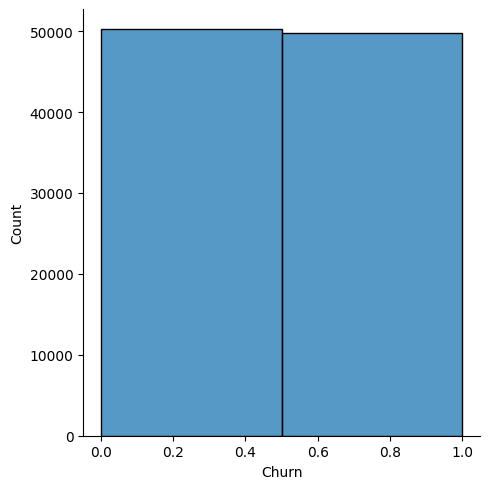

In [125]:
sns.displot(data = df,x='Churn',kde=False,bins=2)
plt.show()

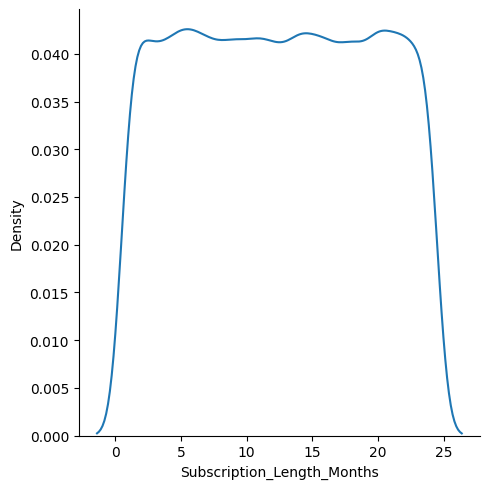

In [126]:
# How much months customers stays in company before leaving it??
no_churn = df[df['Churn'] == 0]
sns.displot(data= no_churn,x='Subscription_Length_Months',kind = 'kde')
plt.show()

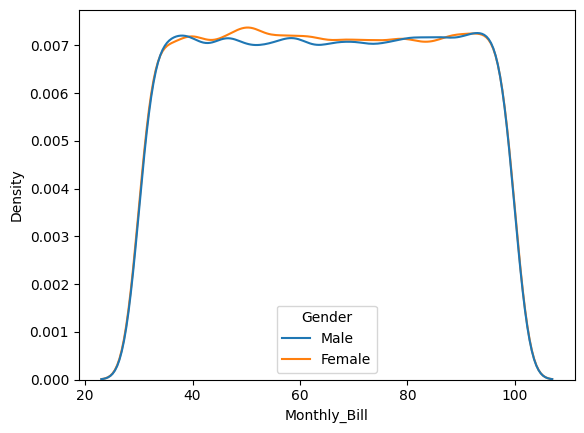

In [127]:
sns.kdeplot(data = df,x='Monthly_Bill',hue='Gender')
plt.show()
# montly bill equal for both genders..

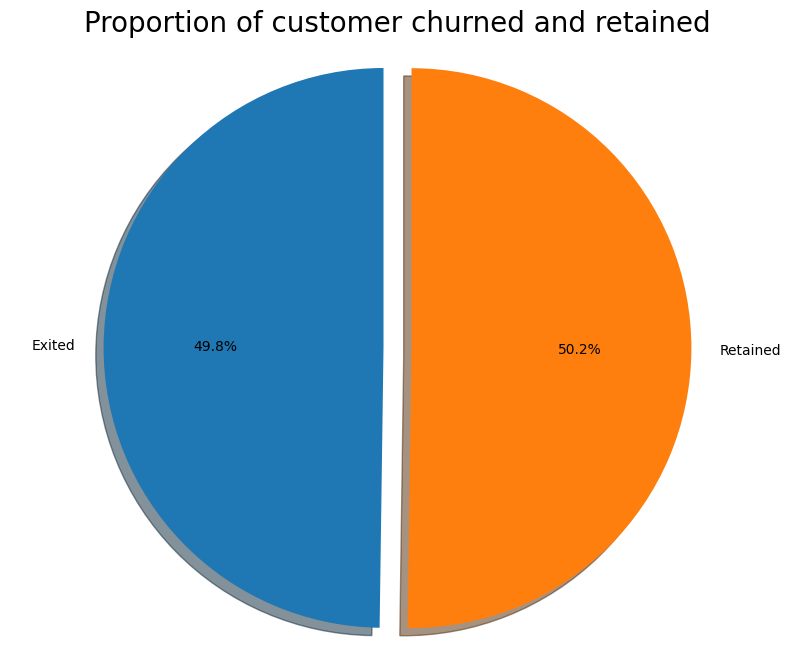

In [128]:
labels = 'Exited', 'Retained'
sizes = [df.Churn[df['Churn']==1].count(), df.Churn[df['Churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

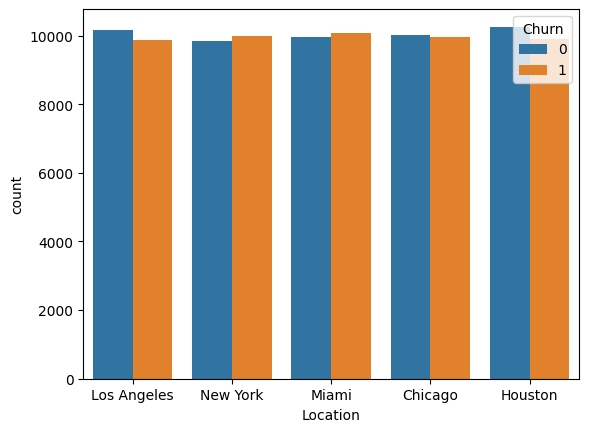

In [129]:
#fig, axarr = plt.subplots(2, 1, figsize=(10, 8))
sns.countplot(x='Location', hue = 'Churn',data = df)
plt.show()

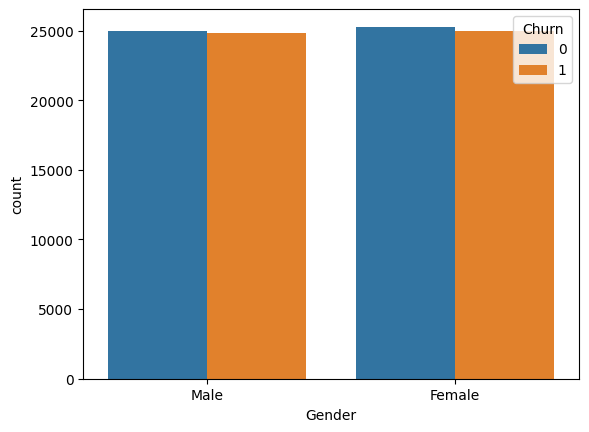

In [130]:
#fig, axarr = plt.subplots(2, 1, figsize=(10, 8))
sns.countplot(x='Gender', hue ='Churn',data = df)
plt.show()


In [131]:
# FEATURE ENGINEERING

In [ ]:
df = df.drop(labels= [ 'CustomerID', 'Name'],axis =1)

In [ ]:
df.columns = df.columns.str.replace(' ', '')

In [82]:
df = pd.get_dummies(data = df, columns=['Location','Gender'])

# Remove irrelevant columns


In [84]:
df.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn', 'Location_Chicago', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [101]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title('Confusion Matrix')
    plt.show()

In [ ]:
# MODEL BUILDING

In [100]:
# MODEL - 1 : RandomForestClassifier

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the dataset into features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)
# Fit the model on the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, random_state=42)

In [120]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [121]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

Accuracy: 49.46


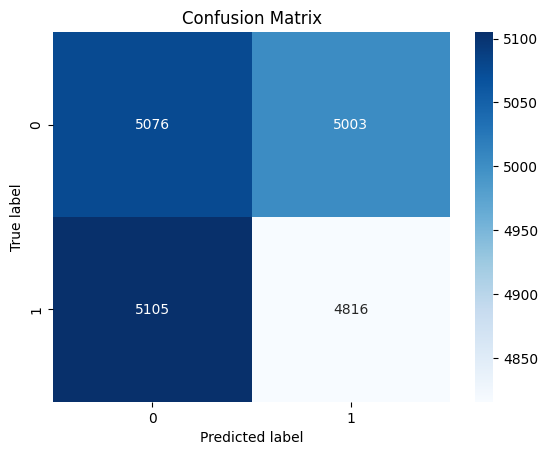

In [133]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

In [123]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

Precision: 0.4904776453814034


In [124]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

Recall: 0.4854349359943554


In [ ]:
# MODEL-2: dt

In [41]:
from sklearn import tree


In [42]:
model_dt = tree.DecisionTreeClassifier()


In [51]:
model_dt.fit(X_train ,y_train)


DecisionTreeClassifier()

In [52]:
# Make predictions on the test data
y_pred = model_dt.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

Accuracy: 50.2


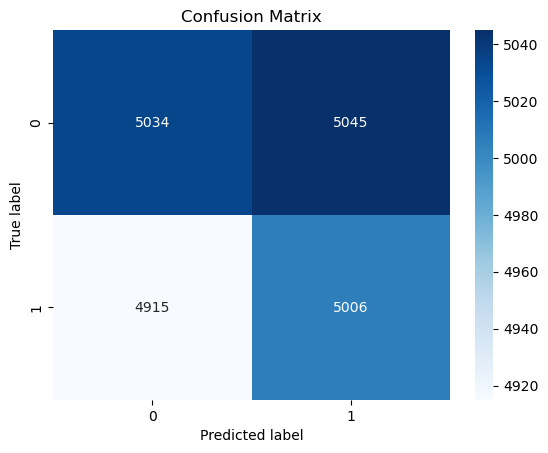

In [54]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

In [56]:
#NAIVE BAYES

In [57]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

In [59]:
model_nb.fit(X_train,y_train)

GaussianNB()

In [61]:
y1 = model_nb.score(X_train,y_train)
y = y1*100
print("ACCURACY OF NAIVE BAYES MODEL IS: ",y)

ACCURACY OF NAIVE BAYES MODEL IS:  50.525


In [63]:
y_train[:10]


75220    1
48955    1
44966    1
13568    1
92727    1
51349    0
86979    1
3806     0
91822    1
6006     0
Name: Churn, dtype: int64

In [64]:
print(list(model_nb.predict(X_train[:10])))


[1, 1, 0, 0, 1, 0, 0, 0, 1, 0]


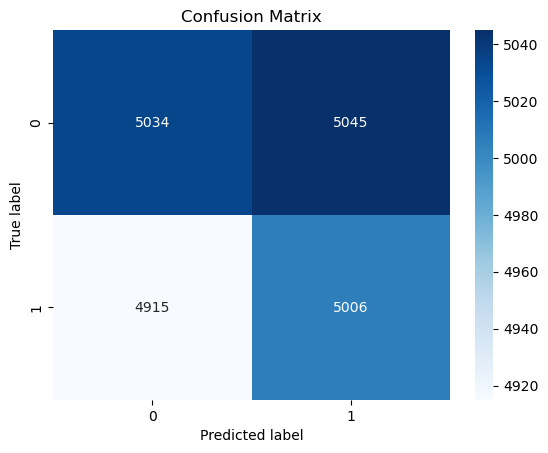

In [65]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

In [1]:
#XGBOOST


In [6]:
import xgboost as xgb


In [7]:
model_xb = xgb.XGBClassifier()


In [65]:
model_xb.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [66]:
b1 = model_xb.score(X_train,y_train)

In [67]:
b = b1*100
print("ACCURACY OF XGBOOST MODEL IS: ",b)

ACCURACY OF XGBOOST MODEL IS:  65.36625000000001


In [68]:
y_train[:10]


75220    1
48955    1
44966    1
13568    1
92727    1
51349    0
86979    1
3806     0
91822    1
6006     0
Name: Churn, dtype: int64

In [69]:
print(list(model_xb.predict(X_train[5:10])))


[1, 1, 0, 0, 1]


# Report

# Documentation